## **Accesibilidad De Internet**

En este notebook nos haremos un analisis exploratorio de los datos que se encuentran en el Dataset. Nuestro objetivo principal es aplicar metodos matematicos y el uso de graficos con el fin de encontrar informacion util como:

* Outliers
* Quartiles
* Metodos estadisticos (Moda, Media, Mediana, Varianza, Desviacion Estandar)
* Stack Ranks

Nuestro codigo se repartira en distintas secciones teniendo una similitud con el patron Modelo - Vista - Controlador (MVC):

Celda de librerias.
Celda de acciones.
Celda de vistas.

## **Enfoque**

Los datos que tomaremos para el ejercicio sera:

* "data\Internet_Penetracion.csv"
* "data\Internet_Accesos-por-tecnologia.csv"
* "data\Internet_BAF.csv"

Esto nos permitira observar la penetracion que se ha tenido durante los ultimos 8 años, el tipo de tecnologia utilizado por provincia y los tipos de accesos mas recurrentes dentro de las provincias. De esta manera podremos tener una perspectiva global de como Argentina se ha desarrollado durante esta ultima decada a nivel tecnologico y de conectividad. Este ejercicio solo pretender observar el desarrollo del uso del internet fijo o de hogar.


## 1. Librerias
Esta celda nos ayudara a cargar las librerias necesarias y extraer los Datasets necesarios.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #Estandarizamos los diseños de la grafica

#Carga del dataset
inter_hogar = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_Penetracion.csv", sep=",")
inter_tech = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_BAF.csv",sep=",")
inter_acess = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_Accesos-por-conectividad.csv",sep=",")

## 2. Acciones
Esta celda nos ayudara a crear todas las funciones que se vayan requiriendo durante el ejercicio.

## 3. Vistas
Las siguientes celdas se enfocaran en el analisis exploratorio de los distintos Datasets

## 3.1 Internet Penetracion EDA

Las columnas encontradas en este Dataset que tomaremos en cuenta son:

* Año
* Trimestre
* Acceso por cada 100 hogares
* Accesos por cada 100 hab
* Periodo

## 3.1.1 Agrupacion de datos y observacion en el tiempo

Agrupemos los datos por Año y por Trimestre con el objetivo de analizar la accesibilidad tanto por hogares como por habitantes.

In [153]:
inter_hogar.value_counts().sort_index().head(20)

Año   Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  Periodo      
2014  1          49.55                         15.05                     Ene-Mar 2014     1
      2          49.86                         15.16                     Abr-Jun 2014     1
      3          50.67                         15.43                     Jul-Sept 2014    1
      4          50.50                         15.39                     Oct-Dic 2014     1
2015  1          51.36                         15.68                     Ene-Mar 2015     1
      2          51.76                         15.82                     Abr-Jun 2015     1
      3          52.46                         16.05                     Jul-Sept 2015    1
      4          52.63                         16.12                     Oct-Dic 2015     1
2016  1          51.85                         15.90                     Ene-Mar 2016     1
      2          53.34                         16.37                     Abr-Jun 2016

In [154]:
inter_hogar.value_counts().sort_index().tail(20)

Año   Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  Periodo      
2018  1          58.82                         18.12                     Ene-Mar 2018     1
      2          59.16                         18.24                     Abr-Jun 2018     1
      3          60.69                         18.73                     Jul-Sept 2018    1
      4          61.42                         18.97                     Oct-Dic 2018     1
2019  1          62.48                         19.31                     Ene-Mar 2019     1
      2          64.53                         19.96                     Abr-Jun 2019     1
      3          65.79                         20.36                     Jul-Sept 2019    1
      4          62.92                         19.49                     Oct-Dic 2019     1
2020  1          62.86                         19.48                     Ene-Mar 2020     1
      2          64.21                         19.92                     Abr-Jun 2020

## Observaciones: 
        * La accesibilidad respecto a la adquisicion de internet en el hogar aumento gradualmente conforme pasaban los años.

        * De la misma manera, vemos como por cada 100 habitantes, el acceso de este servicio fue aumentando.

## Outliers

Analicemos si encontramos Outliers tanto para los hogares como habitantes. A primera vista puede que no encontremos valores que se encuentren por fuera de lo normal debido a la continuidad dentro de nuestros datos

In [155]:
iqr = inter_hogar["Accesos por cada 100 hogares"].quantile(0.75) - inter_hogar["Accesos por cada 100 hogares"].quantile(0.25) #rango intercuartil

umbral_sup = inter_hogar["Accesos por cada 100 hogares"].quantile(0.75) + 1.5 * iqr
umbral_inf = inter_hogar["Accesos por cada 100 hogares"].quantile(0.25) -1.5 * iqr

outliers_sup = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hogares"] > umbral_sup]
outliers_inf = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hogares"]  < umbral_inf]

print(f"""Outliers superiores - hogares: {outliers_sup.values}
Outliers inferiores - hogares: {outliers_inf.values}""")

print(""" """)

iqr = inter_hogar["Accesos por cada 100 hab"].quantile(0.75) - inter_hogar["Accesos por cada 100 hab"].quantile(0.25) #rango intercuartil

umbral_sup = inter_hogar["Accesos por cada 100 hab"].quantile(0.75) + 1.5 * iqr
umbral_inf = inter_hogar["Accesos por cada 100 hab"].quantile(0.25) -1.5 * iqr

outliers_sup = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hab"] > umbral_sup]
outliers_inf = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hab"]  < umbral_inf]

print(f"""Outliers superiores - habitantes: {outliers_sup.values}
Outliers inferiores - habitantes: {outliers_inf.values}""")

Outliers superiores - hogares: []
Outliers inferiores - hogares: []
 
Outliers superiores - habitantes: []
Outliers inferiores - habitantes: []


## Observaciones:
        * Como habiamos predicho, no hay valores de outliers debido a la uniformidad de los valores en nuestra base de datos

## Cambio en el tiempo

Analicemos la adquisicion del servicio de internet entre los años 2014 y 2022

C:\Users\andre\AppData\Local\Temp\ipykernel_12256\2164358540.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hogares", palette="pastel")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\andre\AppData\Local\Temp\ipykernel_12256\2164358540.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hab", palette="pastel")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


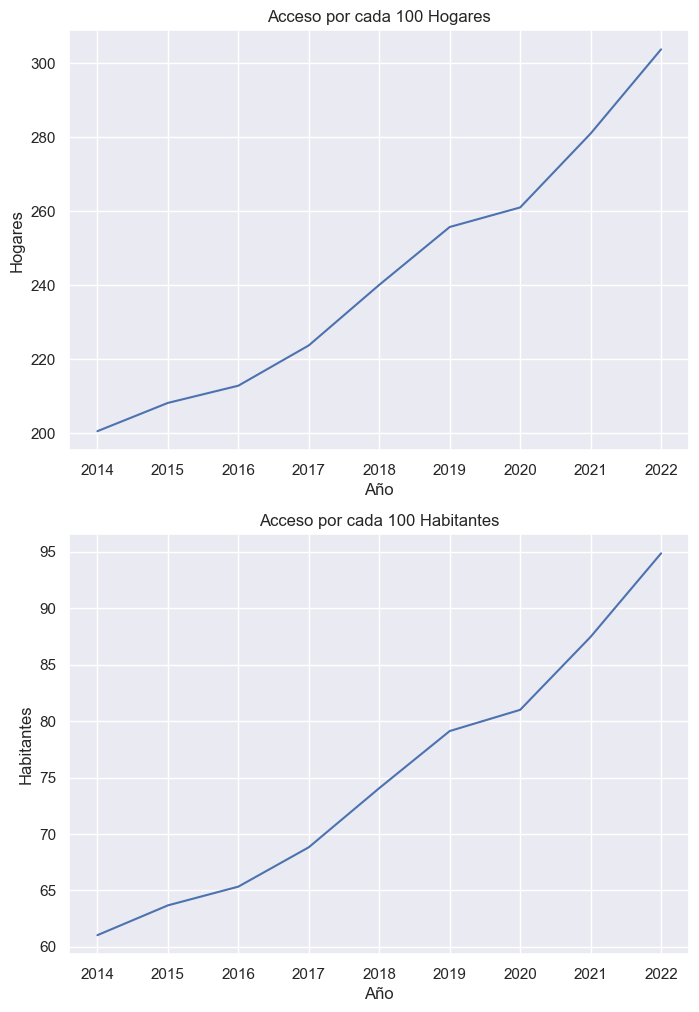

In [188]:
#Plots------------------------------------------------------------------
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hogares", palette="pastel")
plt.xlabel("Año")
plt.ylabel("Hogares")
plt.title("Acceso por cada 100 Hogares")
ax = plt.gca()
ax.legend().set_visible(False)

plt.subplot(2,1,2)
sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hab", palette="pastel")
plt.xlabel("Año")
plt.ylabel("Habitantes")
plt.title("Acceso por cada 100 Habitantes")
ax = plt.gca()
ax.legend().set_visible(False)

plt.show()

In [196]:
#Maximos y minimos.

#Hogares----------------------------------------------------
inter_hogar_anio = inter_hogar[["Año", "Accesos por cada 100 hogares"]]
inter_hogar_anio = pd.DataFrame(inter_hogar_anio.groupby("Año").sum()).reset_index()
max_anio = int(inter_hogar_anio.max().iloc[0])
min_anio = int(inter_hogar_anio.min().iloc[0])
delta = ((inter_hogar_anio.max().iloc[1] - inter_hogar_anio.min().iloc[1])/inter_hogar_anio.min().iloc[1])*100

print(f"""Año con mayor acceso a internet por hogares: {max_anio}
Año con menor acceso a internet por hogares: {min_anio}
Cambio porcentual entre el {min_anio} - {max_anio}: {round (delta,2)}% \n""")


#Habitantes--------------------------------------------------------
inter_hogar_anio = inter_hogar[["Año", "Accesos por cada 100 hab"]]
inter_hogar_anio = pd.DataFrame(inter_hogar_anio.groupby("Año").sum()).reset_index()
max_anio = int(inter_hogar_anio.max().iloc[0])
min_anio = int(inter_hogar_anio.min().iloc[0])
delta = ((inter_hogar_anio.max().iloc[1] - inter_hogar_anio.min().iloc[1])/inter_hogar_anio.min().iloc[1])*100

print(f"""Año con mayor acceso a internet por habitantes: {max_anio}
Año con menor acceso a internet por habitantes: {min_anio}
Cambio porcentual entre el {min_anio} - {max_anio}: {round(delta,2)}% \n""")

#Cambios entre el 2020 y 2021-----------------------------------

inter_filtro = pd.DataFrame(inter_hogar.groupby("Año").sum()).reset_index()
anio_2020 = inter_hogar[inter_hogar["Año"] == 2020].iloc[0]
anio_2021 = inter_hogar[inter_hogar["Año"] == 2021].iloc[0]

#Hogares
anio_2020_valor = anio_2020[2]
anio_2021_valor = anio_2021[2]
delta = round(
    ((anio_2021_valor - anio_2020_valor) / anio_2020_valor)*100
    ,2)
print(f"El salto en el uso de internet en hogares entre el 2020 y 2021 es: {delta}%\n")

#Habitantes
anio_2020_valor = anio_2020[3]
anio_2021_valor = anio_2021[3]
delta = round(
    ((anio_2021_valor - anio_2020_valor) / anio_2020_valor)*100
    ,2)
print(f"El salto en el uso de internet por habitantes entre el 2020 y 2021 es de: {delta}%\n")

Año con mayor acceso a internet por hogares: 2022
Año con menor acceso a internet por hogares: 2014
Cambio porcentual entre el 2014 - 2022: 51.41% 

Año con mayor acceso a internet por habitantes: 2022
Año con menor acceso a internet por habitantes: 2014
Cambio porcentual entre el 2014 - 2022: 55.45% 

El salto en el uso de internet en hogares entre el 2020 y 2021 es: 7.64%

El salto en el uso de internet por habitantes entre el 2020 y 2021 es de: 7.99%



C:\Users\andre\AppData\Local\Temp\ipykernel_12256\3040991014.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anio_2020_valor = anio_2020[2]
C:\Users\andre\AppData\Local\Temp\ipykernel_12256\3040991014.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anio_2021_valor = anio_2021[2]
C:\Users\andre\AppData\Local\Temp\ipykernel_12256\3040991014.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anio_2020_valor = anio_2020[3]
C

## Observaciones:

        * 